### Sub graphs

In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [2]:
class SubState(TypedDict):
    number: int

In [3]:
def multiply(state: SubState):
    return {"number": state["number"] * 2 }

def add(state: SubState):
    return {"number": state["number"] + 10 }

In [5]:
sub_work = StateGraph(SubState)
sub_work.add_node("multiply", multiply)
sub_work.add_node("add", add)
sub_work.set_entry_point("multiply")
sub_work.add_edge("multiply", "add")
sub_work.set_finish_point("add")

sub_graph = sub_work.compile()

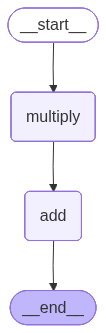

In [6]:
sub_graph

In [7]:
from typing import Optional
class MainState(TypedDict):
    number: int
    answer: Optional[int]


def announce_result(state: MainState):
    return { "answer": state["number"] }


# Build the Main graph

main_work = StateGraph(MainState)
main_work.add_node("subgraph", sub_graph)
main_work.add_node("answer", announce_result)

main_work.set_entry_point("subgraph")
main_work.add_edge("subgraph", "answer")
main_work.set_finish_point("answer")

main_graph = main_work.compile()

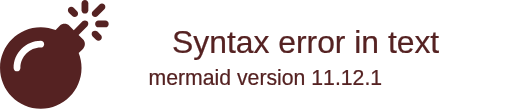

In [ ]:
# from utils import draw_graph
# draw_graph(main_graph)

In [11]:
main_graph.invoke({"number": 5})

{'number': 20, 'answer': 20}